In [1]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using Theano backend.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/home/ec2-user/anaconda3/envs/theano_p36/lib/python3.6/site-packages/theano/gpuarray/dnn.py:184: UserWarning: Your cuDNN version is more recent than Theano. If you encounter problems, try updating Theano or downgrading cuDNN to a version >= v5 and <= v7.
  warnings.warn("Your cuDNN version is more recent than "
Using cuDNN version 7301 on context None
Mapped name None to device cuda: Tesla K80 (0000:00:17.0)


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output

In [3]:
class PlotLearning(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
        
        clear_output(wait=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="accuracy")
        ax2.plot(self.x, self.val_acc, label="validation accuracy")
        ax2.legend()
        
        plt.show();
        
plot = PlotLearning()

In [4]:
classifier = Sequential()

In [5]:
classifier.add(Conv2D(32, (3, 3), input_shape = (32, 32, 3), activation = 'relu'))

In [6]:
classifier.add(Conv2D(32, (3, 3)))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

classifier.add(Conv2D(64, (3, 3), padding='same'))
classifier.add(Activation('relu'))
classifier.add(Conv2D(64, (3, 3)))
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.25))

classifier.add(Flatten())
classifier.add(Dense(512))
classifier.add(Activation('relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(3))
classifier.add(Activation('softmax'))

# TODO: change sigmoid to softmax and increase the number of classes that the Dense layer has (25)

# initiate RMSprop optimizer
opt = keras.optimizers.adam(lr=0.0001, decay=1e-6)

In [12]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('train_4',
    target_size = (32, 32),
    batch_size = 32,
    class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('test_4',
    target_size = (32, 32),
    batch_size = 32,
    class_mode = 'categorical')

Found 7085 images belonging to 3 classes.
Found 167 images belonging to 3 classes.


In [13]:
classifier.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

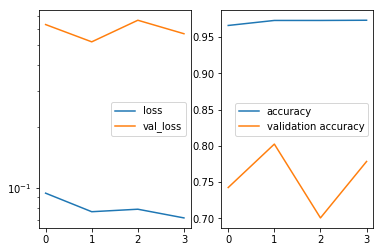

Epoch 5/50
 47/222 [=====>........................] - ETA: 25s - loss: 0.0649 - acc: 0.9774

KeyboardInterrupt: 

In [22]:
classifier.fit_generator(training_set,
epochs = 50,
callbacks = [plot],
validation_data = test_set)
classifier.save('keras_classifier.h5')

In [23]:
classifier.evaluate_generator(test_set)

[0.6612411755287718, 0.6946107791569418]

In [29]:
import numpy as np
import heapq
from keras.preprocessing import image

#alphabet = [' ', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
alphabet = ['A', 'B', 'C']

test_image = image.load_img('c.jpg', target_size = (32, 32))
test_image = (image.img_to_array(test_image)) / 255.
test_image = np.expand_dims(test_image, axis = 0)

result = classifier.predict(test_image)
indices = (-result[0]).argsort()[:3]
# TODO: doing argmax on the result to find which letter it corresponds to
result_index = np.argmax(result)
print(result)
print(max(result[0]) / sum(result[0]))
print(alphabet[result_index])

print("top 3 guesses:\n")
print([alphabet[i] for i in indices])

# print(result[0][0])
# if result[0][0] < 0.5:
#     prediction = 'A'
# else:
#     prediction = 'B'
    
# print(prediction)

[[0.18711892 0.00131001 0.81157106]]
0.8115710720983786
C
top 3 guesses:

['C', 'A', 'B']


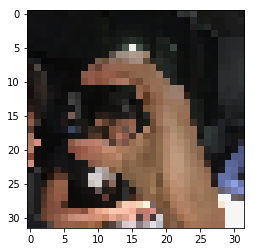

In [30]:

im = test_image
import matplotlib.pyplot as plt
plt.imshow(im[0])

In [ ]:
plt.show()

In [16]:
classifier.save('keras_classifier.h5')